In [6]:
# Common imports
import numpy as np
import numpy.random as rnd
import pandas as pd

In [7]:
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [8]:
housing=pd.read_csv('housing.csv')

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
%matplotlib inline 

In [10]:
import matplotlib.pyplot as plt 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1145303c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1157dfb70>]], dtype=object)

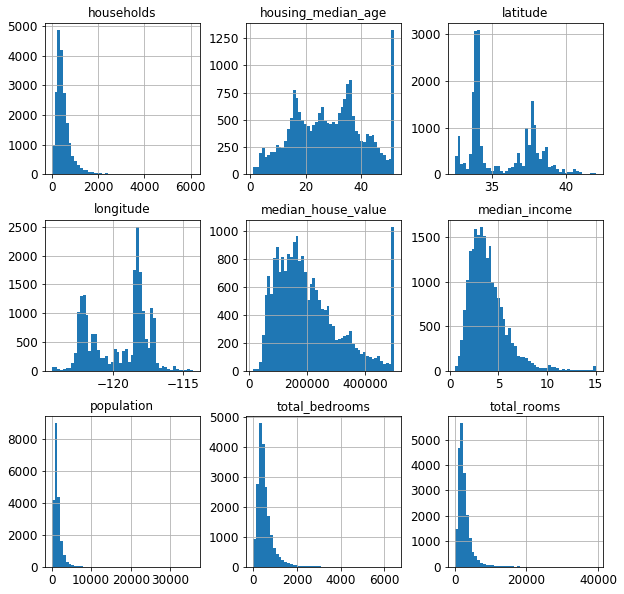

In [14]:
housing.hist(bins=50,figsize=(10,10))

In [16]:
housing['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
100000.0     62
125000.0     56
67500.0      55
250000.0     47
200000.0     46
118800.0     39
450000.0     37
156300.0     35
212500.0     33
193800.0     31
181300.0     31
300000.0     30
75000.0      30
81300.0      29
55000.0      29
93800.0      29
106300.0     28
143800.0     28
400000.0     27
           ... 
373500.0      1
433000.0      1
354600.0      1
389700.0      1
370100.0      1
304200.0      1
477200.0      1
422500.0      1
445900.0      1
309000.0      1
413100.0      1
465700.0      1
353700.0      1
438900.0      1
396700.0      1
380300.0      1
478500.0      1
455300.0      1
403000.0      1
363900.0      1
494400.0      1
389800.0      1
347500.0      1
487000.0      1
331100.0      1
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value

In [2]:
# training set and test set creation using a function

import numpy as np


In [9]:
# defininig function
# shuffle index using np.random.permutation
# find test size = 
def test_train_split(data, test_ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_size = int(len(data)* test_ratio)
    test_indexes=shuffled_indexes[:test_size]
    train_indexes=shuffled_indexes[test_size:]
    return data.iloc[train_indexes],data.iloc[test_indexes]
     

In [10]:
train_set, test_set =test_train_split(housing,0.2)

In [15]:
import hashlib
def test_set_check( identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256 * test_ratio

    

In [16]:
def test_train_split(data, test_ratio,id_column, hash=hashlib.md5):
    ids= data[id_column]
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing_with_id = housing.reset_index()

In [22]:
train_set, test_set =test_train_split(housing_with_id,0.2,"index")

In [23]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY


In [24]:
# best way to do train test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


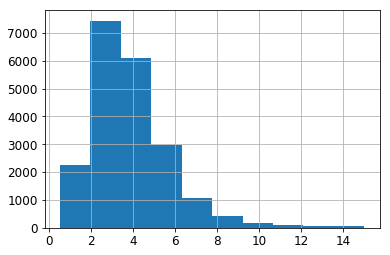

In [29]:
housing['median_income'].hist()

In [30]:
housing["income_cat"]= np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

In [ ]:
## Discover and visualize the data to gain insights

In [37]:
housing=strat_train_set.copy()

In [38]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


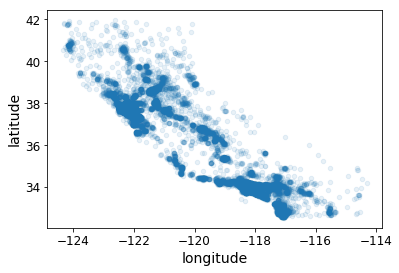

In [42]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

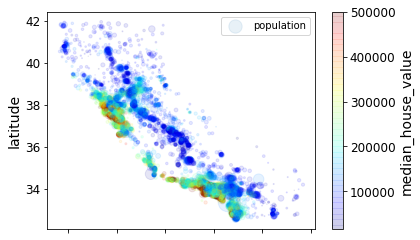

In [58]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,
            s=housing['population']/100,label='population',c="median_house_value",cmap="jet",colorbar=True)


In [60]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [63]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
# using scatter matrix to plot every numerical attribute against every other numerical attribute

In [67]:
from pandas.tools.plotting import scatter_matrix

In [68]:
attributes= ["median_house_value","median_income","total_rooms",
            "housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4b2828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11af519b0>]], dtype=object)

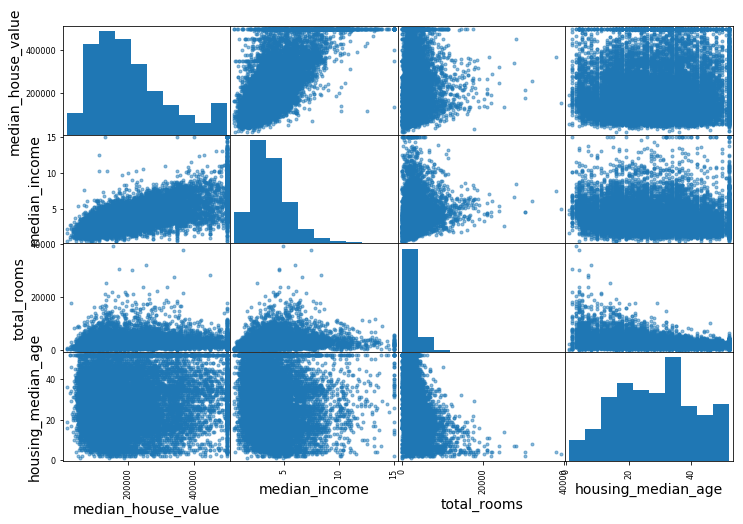

In [71]:
scatter_matrix(housing[attributes],figsize=(12,8))

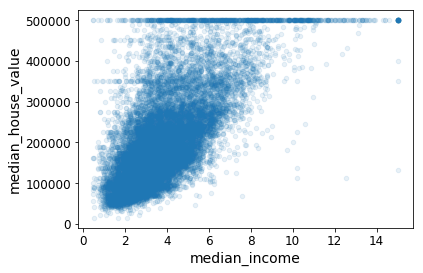

In [73]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [74]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [75]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]

In [76]:
housing['bedroom_per_room']=housing['total_bedrooms']/housing['total_rooms']

In [77]:
housing['population_per_household']=housing['population']/housing['households']

In [78]:
corr_matrix=housing.corr()

In [79]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

In [ ]:
#Prepare the data for Machine Learning algorithms

In [86]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [84]:
housing_label= strat_train_set["median_house_value"]

In [85]:
housing_label

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
5825     280900.0
18086    500001.0
16718    171300.0
13600    116600.0
13989     60800.0
15168    121100.0
6747     270700.0
7398     109900.0
5562     159600.0
16121    500001.0
           ...   
12380    122500.0
5618     350000.0
10060    172800.0
18067    500001.0
4471     146600.0
19786     81300.0
9969     247600.0
14621    164100.0
579      254900.0
11682    185700.0
245      126800.0
12130    114200.0
16441    101800.0
11016    265600.0
19934     88900.0
1364     225000.0
1236     123500.0
5364     500001.0
11703    321600.0
10356    266000.0
15270    346700.0
3754     190200.0
12166    148800.0
6003     214800.0
7364     1

In [ ]:
## Dealing with Missing values

In [87]:
from sklearn.preprocessing import Imputer

In [89]:
imputer = Imputer(strategy= 'median')
# imputer is an estimator, strategy is called hyperparameter

In [91]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [92]:
imputer.fit(housing_num)
# imputer performing estimation

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [93]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [94]:
X= imputer.transform(housing_num)

In [95]:
housing_tr= pd.DataFrame(X, columns= housing_num.columns)

In [96]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [97]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [ ]:
# convert text to numerical values - for example ocean_proximity

1. Label Encoder
2. create an object of labelencoder()
3. select the column that needed to be encoded
4. do a fit and transform on that column
5. print the value

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
encoder= LabelEncoder()

In [100]:
 housing_cat=housing['ocean_proximity']

In [101]:
 housing_cat_endoded=encoder.fit_transform(housing_cat)

In [102]:
 housing_cat_endoded

array([0, 0, 4, ..., 1, 0, 3])

In [103]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

the problem with this is system thinks value that 0 is assigned to is close to 1 and so on which is not true at all. The solution is to create a binary attribute per category. This is called one hot encoding becuase only one attribute will be 1 while all others will be 0. Sklearn provides way to convert integer categorical values into one hot vectors. Note that fit_transform expects a 2 D array but housing_cat_encoded is a 1 D array, so we need to reshape it

In [104]:
 from sklearn.preprocessing import OneHotEncoder

In [105]:
 encoder= OneHotEncoder()

In [106]:
 housing_cat_1hot=encoder.fit_transform( housing_cat_endoded.reshape(-1,1))

In [107]:
 housing_cat_1hot
    # it's a Scipy sparse matrix. to convert it into numpy array, use toarray()

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

both the above steps- from text to integer cagetories and from integer to one hot vectors can be done using one method LabelBinarizer class

In [109]:
from sklearn.preprocessing import LabelBinarizer

In [110]:
encoder= LabelBinarizer()

In [111]:
housing_cat_1hot=encoder.fit_transform(housing_cat)

In [112]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [113]:
# CUSTOM TRANSFORMERS
#housing_num=housing.drop("ocean_proximity",axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [ ]:
# Feature Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
sc_X = StandardScaler()

In [119]:
housing_tr=sc_X.fit_transform(housing_tr)

In [ ]:
# Pipeline class to sequence all the transformation

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [123]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline.fit_transform(housing_num)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [ ]:
# FULL Pipeline for both numerical and categorical variables looks like this

In [124]:
#housing_num=housing.drop("ocean_proximity",axis=1)
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

preparation_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


In [126]:
housing_prepared= preparation_pipeline.fit_transform(housing)

In [127]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [131]:
# Training and Evaluating on the training set

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lin_reg= LinearRegression()

In [135]:
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
# RMSE

from sklearn.metrics import mean_squared_error

In [138]:
housing_prediction = lin_reg.predict(housing_prepared)
housing_prediction 

array([ 210644.60459286,  317768.80697211,  210956.43331178, ...,
         95464.57062437,  214353.22541713,  276426.4692067 ])

In [141]:
mse= mean_squared_error(housing_label, housing_prediction)
rms=np.sqrt(mse)
rms

68628.198198489234

 the result shows that the prediction error is $68,628 between the actual and predicted house value

In [ ]:
# Lets try Decision tree regressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
tree_reg= DecisionTreeRegressor()

In [144]:
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [146]:
housing_prediction = tree_reg.predict(housing_prepared)
housing_prediction

array([ 286600.,  340600.,  196900., ...,   97800.,  225900.,  500001.])

In [147]:
mse= mean_squared_error(housing_label, housing_prediction)
rms=np.sqrt(mse)
rms
# Clear case of overfitting

0.0

#  Better Evaluation using Crossvalidation 

##  Fine Tune the Model

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
scores= cross_val_score(tree_reg, housing_prepared,housing_label,
                       scoring= "neg_mean_squared_error",cv=10)


In [159]:
tree_rmse_scores = np.sqrt(-scores)

In [160]:
tree_rmse_scores 

array([ 69316.02634772,  65498.84994772,  71404.25935862,  69098.46240168,
        70580.30735263,  75540.88413124,  69717.93143674,  70428.42648461,
        75888.17618283,  68976.12268448])

In [161]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 69316.02634772  65498.84994772  71404.25935862  69098.46240168
  70580.30735263  75540.88413124  69717.93143674  70428.42648461
  75888.17618283  68976.12268448]
Mean: 70644.9446328
Standard deviation: 2938.93789263


# Trying the scores on linear model- crossvalidation on linear model

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
scores= cross_val_score(lin_reg, housing_prepared,housing_label,
                       scoring= "neg_mean_squared_error",cv=10)

In [164]:
tree_rmse_scores = np.sqrt(-scores)

In [165]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [ ]:
# Decision tree overfits more thn the linear regression model

Now Lets try one last model- Random Forest Regressor. This model trains several decision tree on random subsets adn then average their predictions . This follows Ensemble learning.

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
forest_reg= RandomForestRegressor()

In [168]:
forest_reg.fit(housing_prepared,housing_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [170]:
housing_prediction = forest_reg.predict(housing_prepared)
housing_prediction

array([ 248660. ,  311190. ,  226410. , ...,  101560. ,  207600. ,
        432390.5])

In [171]:
mse= mean_squared_error(housing_label, housing_prediction)
forest_rms=np.sqrt(mse)
forest_rms

22252.738943108321

In [172]:
scores= cross_val_score(forest_reg, housing_prepared,housing_label,
                       scoring= "neg_mean_squared_error",cv=10)


In [173]:
forest_rmse_scores = np.sqrt(-scores)

In [174]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [ 52869.23106834  49189.93801195  51726.73647871  54995.98190463
  50979.93079904  55978.43765914  52283.7609046   51001.92227546
  54447.35786983  53389.94422283]
Mean: 52686.3241195
Standard deviation: 1971.26547795


In [ ]:
# Random forest gives the best results when compared with other models


# Fine Tune your Model

One way to do this is to fiddle with hyperparameters until we get the best possible hyperparameters. Instead we can use Scikit learn Grid searchCV for this. All we need to enter here is the which hyperparameter we want to try out.  

Example, this code searches best possible combination of hyperparameter values for RandomForestRegressor


In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
             ]


In [177]:
forest_reg= RandomForestRegressor()

In [178]:
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error')

In [179]:
grid_search.fit(housing_prepared,housing_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

The param grid tells scikit learn to first evaluate 3*4=12 estimators of n_estimators and max_features in the first dict.  Then try all 2*3=6 estimators in second dict but this time with bootstrap = False. All in all, we have 18 combinations of RandomForest Regressor and since we are using 5 fold CV, there will be 18*5=90 rounds of training.


In [180]:
grid_search.best_params_
# best parameters

{'max_features': 6, 'n_estimators': 30}

In [182]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [183]:
# evaluation scores

grid_search.cv_results_

{'mean_fit_time': array([ 0.09438367,  0.28249745,  0.79082317,  0.13130646,  0.42429571,
         1.24584455,  0.17652483,  0.58857212,  1.74801555,  0.22928829,
         0.7531796 ,  2.28193631,  0.12738895,  0.39796472,  0.17103968,
         0.53561659,  0.20502176,  0.66987691]),
 'mean_score_time': array([ 0.00556817,  0.01281967,  0.03887587,  0.00422029,  0.01215501,
         0.04773407,  0.00439219,  0.01362495,  0.03375282,  0.00463042,
         0.01224203,  0.03744988,  0.00546107,  0.01487756,  0.00553198,
         0.01660156,  0.00478697,  0.01617508]),
 'mean_test_score': array([ -4.17099467e+09,  -3.08065049e+09,  -2.80361031e+09,
         -3.68662887e+09,  -2.77034904e+09,  -2.55315408e+09,
         -3.42145616e+09,  -2.72571167e+09,  -2.49249454e+09,
         -3.43989513e+09,  -2.74253184e+09,  -2.51099663e+09,
         -3.92203676e+09,  -2.97012415e+09,  -3.64258128e+09,
         -2.74551640e+09,  -3.49898530e+09,  -2.68982445e+09]),
 'mean_train_score': array([ -1.116

In [184]:
cvres=grid_search.cv_results_

In [185]:
for mean_score, params in zip(cvres['mean_test_score'],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64583.2383134 {'max_features': 2, 'n_estimators': 3}
55503.6078699 {'max_features': 2, 'n_estimators': 10}
52949.1294934 {'max_features': 2, 'n_estimators': 30}
60717.6157768 {'max_features': 4, 'n_estimators': 3}
52634.1052674 {'max_features': 4, 'n_estimators': 10}
50528.7451101 {'max_features': 4, 'n_estimators': 30}
58493.2146791 {'max_features': 6, 'n_estimators': 3}
52208.3486668 {'max_features': 6, 'n_estimators': 10}
49924.8890318 {'max_features': 6, 'n_estimators': 30}
58650.6191468 {'max_features': 8, 'n_estimators': 3}
52369.1878452 {'max_features': 8, 'n_estimators': 10}
50109.8456878 {'max_features': 8, 'n_estimators': 30}
62626.1667289 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54498.8454323 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60353.8008531 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52397.6755216 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59152.2214146 {'bootstrap': False, 'max_features': 4, 'n_estim

“Randomized Search
The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.”

Excerpt From: Aurélien Géron. “Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.” iBooks. 

In [187]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c154320>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c1544a8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [188]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51887.8072136 {'max_features': 2, 'n_estimators': 123}
49807.8066887 {'max_features': 7, 'n_estimators': 30}
49635.0103702 {'max_features': 4, 'n_estimators': 186}
54678.0939103 {'max_features': 1, 'n_estimators': 81}
49104.4259702 {'max_features': 6, 'n_estimators': 158}
50195.3175772 {'max_features': 3, 'n_estimators': 194}
49309.6587343 {'max_features': 5, 'n_estimators': 175}
50369.5102565 {'max_features': 4, 'n_estimators': 40}
49440.6407407 {'max_features': 7, 'n_estimators': 70}
49709.0687159 {'max_features': 5, 'n_estimators': 45}


    # Analyse the best Models and their errors
